<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Trend Değişim Noktaları</h2>
  Bu dokümandaki önceki örneklerde, gerçek zaman serilerinin sıklıkla yönelimlerinde ani değişimler yaşadığını fark etmiş olabilirsiniz. Prophet, varsayılan olarak bu değişim noktalarını otomatik olarak tespit eder ve trendin bu değişikliklere uygun şekilde uyum sağlamasını sağlar.<br>
  Ancak, bu süreci daha hassas bir şekilde kontrol etmek isterseniz (örneğin, Prophet bir oran değişikliğini atlamışsa ya da geçmişteki oran değişikliklerini aşırı yorumluyorsa), kullanabileceğiniz birkaç parametre bulunmaktadır.

In [30]:
# Python
import pandas as pd
from prophet import Prophet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Prophet'te Otomatik Değişim Noktası Belirleme</h2>
  Prophet, değişim noktalarını belirlerken önce oran değişikliklerine izin verilen çok sayıda potansiyel nokta tanımlar. Daha sonra, bu değişimlerin büyüklüklerine seyrek bir öncelik (L1 düzenlemesine benzer bir yöntem) uygular. Bu yöntem, Prophet'in oran değişikliğinin gerçekleşebileceği çok sayıda olası nokta belirlemesine rağmen, yalnızca gerekli olanları seçmesini sağlar.<br>
  Örneğin, Quickstart kılavuzundaki Peyton Manning tahmininde Prophet, zaman serisinin ilk %80'lik bölümüne eşit aralıklarla yerleştirilmiş 25 potansiyel değişim noktası tanımlar. Grafikteki dikey çizgiler, bu potansiyel değişim noktalarının yerlerini göstermektedir. Prophet, yalnızca ihtiyaç duyulan değişim noktalarını kullanarak modeli daha sade ve etkili hale getirir.
</font>

16:35:36 - cmdstanpy - INFO - Chain [1] start processing
16:35:36 - cmdstanpy - INFO - Chain [1] done processing


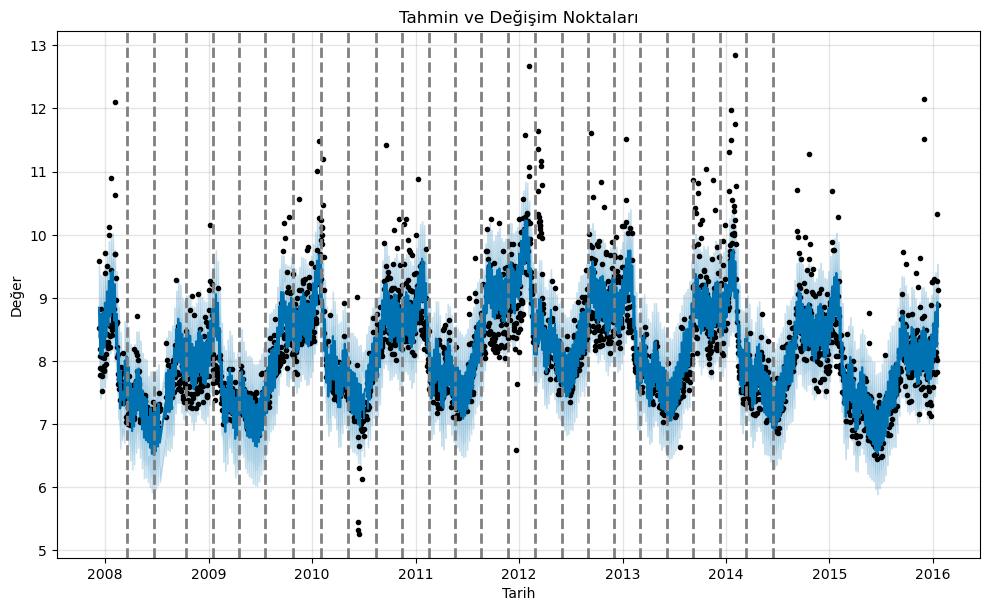

In [32]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

# Prophet modelini oluşturma ve eğitme
m = Prophet(changepoint_prior_scale = 0.05)
m.fit(df)

# Tahmin yapma
forecast = m.predict(df)

# Değişim noktalarını al
changepoints = m.changepoints

# Grafik oluşturma
fig = m.plot(forecast)

# Değişim noktalarını çubuklarla ekleme
for cp in changepoints:
    plt.axvline(x=cp, color='grey', linestyle='--', lw=2)  # Değişim noktalarını dikey çizgiyle işaretliyoruz

# Grafik başlıkları
plt.title('Tahmin ve Değişim Noktaları')
plt.xlabel('Tarih')
plt.ylabel('Değer')

# Grafik gösterme
plt.show()


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Prophet, oran değişikliklerinin gerçekleşebileceği birçok <strong>potential changepoint</strong> (potansiyel değişim noktası) belirler. Ancak, <strong>sparse prior</strong> (seyrek öncelik) sayesinde bu <strong>changepoints</strong>'lerin (değişim noktalarının) çoğu <strong>unused</strong> (kullanılmamış) kalır. Bu durumu, her bir <strong>changepoint</strong> için <strong>rate change</strong> (oran değişikliği) büyüklüğünü grafikte göstererek açıkça görebiliriz.
</font>


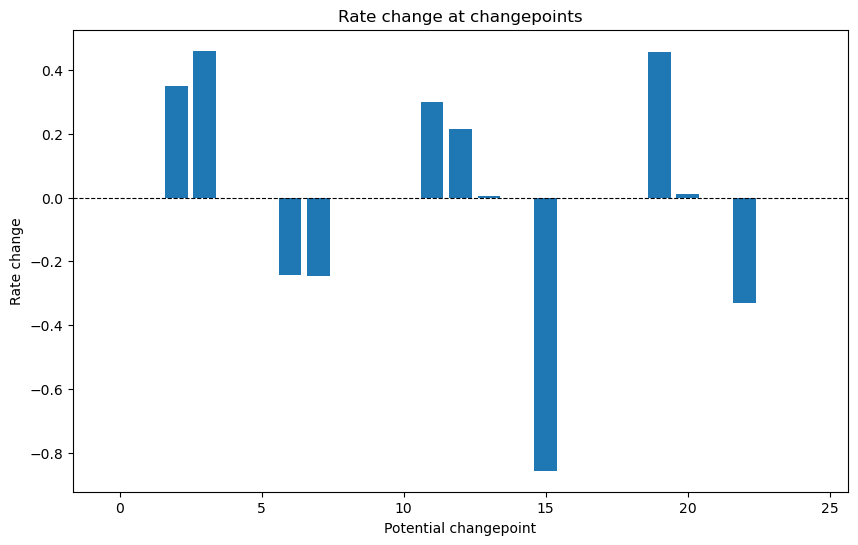

In [33]:
# Changepoint oran değişikliklerini çekme
changepoints = m.changepoints
delta = m.params['delta'].mean(0)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(range(len(delta)), delta, color='C0')  # Mavi ton için C0 kullanılıyor
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Potential changepoint')
plt.ylabel('Rate change')
plt.title('Rate change at changepoints')
plt.show()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  Potansiyel <strong>changepoint</strong> (değişim noktası) sayısı, <strong>n_changepoints</strong> argümanı ile ayarlanabilir. Ancak, bu sayıyı doğrudan değiştirmek yerine, düzenleme (<strong>regularization</strong>) ayarını optimize ederek daha iyi sonuçlar elde edilebilir.
</font>

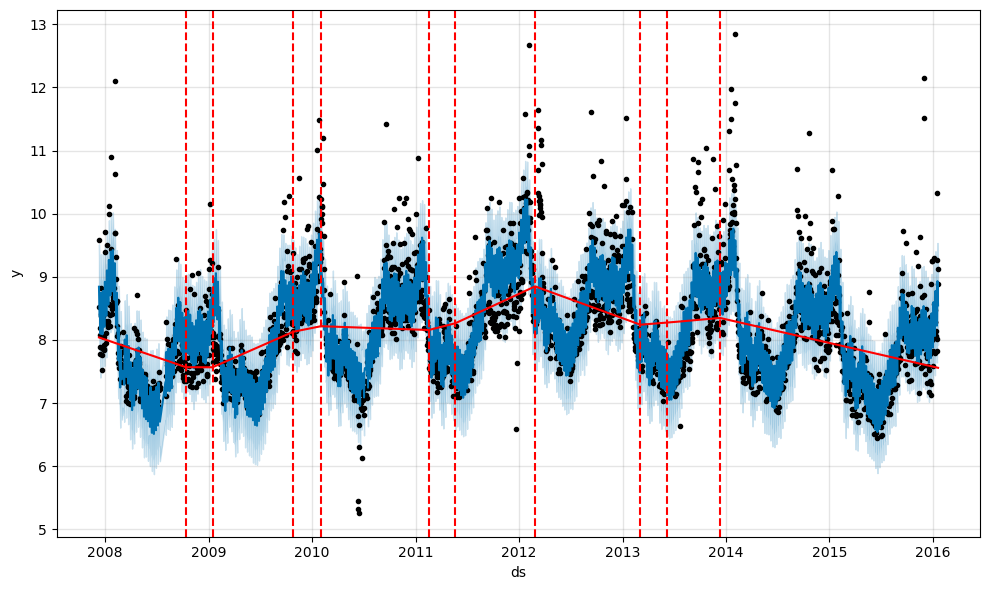

In [34]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  Varsayılan olarak, değişim noktaları (<strong>changepoints</strong>) zaman serisinin yalnızca ilk %80'inde belirlenir. Bu, trendin geleceğe doğru projelendirilmesi için yeterli alan bırakırken, zaman serisinin sonlarındaki dalgalanmalara aşırı uyum sağlanmasını (<strong>overfitting</strong>) engellemeye yardımcı olur. Bu varsayılan ayar birçok durumda işe yarasa da, her durumda uygun olmayabilir.<br>
<strong>changepoint_range</strong> argümanı ile bu ayar değiştirilebilir. Örneğin, Python'da <code>m = Prophet(changepoint_range=0.9)</code> yazarak, değişim noktalarını zaman serisinin ilk %90'ına yerleştirebilirsiniz.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Trend Esnekliğini Ayarlamak</h2>
  Eğer trend değişiklikleri modelde aşırı uyum (<strong>overfitting</strong>) sağlıyorsa (yani model, veriye gereksiz derecede esnek olup fazla detay yakalıyorsa) veya yetersiz uyum (<strong>underfitting</strong>) sağlıyorsa (yani model, veri üzerinde yeterince esnek olmayıp önemli değişimleri göz ardı ediyorsa), trendin esnekliğini ayarlamak için <strong>changepoint_prior_scale</strong> parametresi kullanılabilir.<br>
Bu parametre, modelin trend değişikliklerine ne kadar esneklik vereceğini belirler. Varsayılan değer 0.05'tir. Eğer bu değeri artırırsanız, modelin trendi daha esnek hale gelir ve daha fazla değişim noktası kabul edilerek, daha fazla esneklik sağlanır. Bu, özellikle verinizdeki hızlı değişimleri yakalamak için faydalı olabilir. Ancak, fazla esneklik aşırı uyum yapmaya da yol açabilir:
</font>

16:35:38 - cmdstanpy - INFO - Chain [1] start processing
16:35:39 - cmdstanpy - INFO - Chain [1] done processing


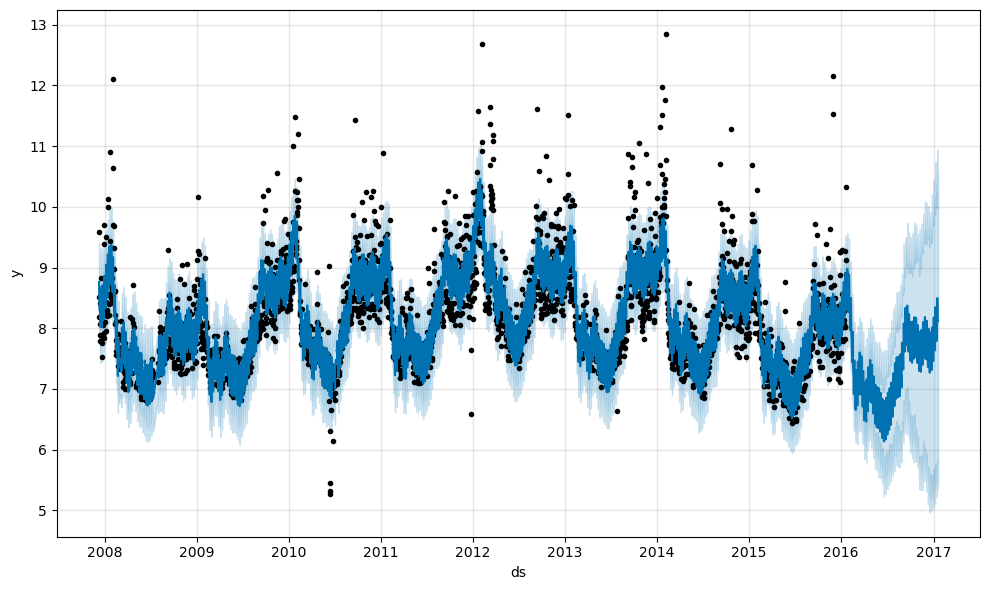

In [35]:
# Python
future = m.make_future_dataframe(periods=365)
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  Azaltmak, trendi daha az esnek hale getirecektir:
</font>

16:35:40 - cmdstanpy - INFO - Chain [1] start processing
16:35:40 - cmdstanpy - INFO - Chain [1] done processing


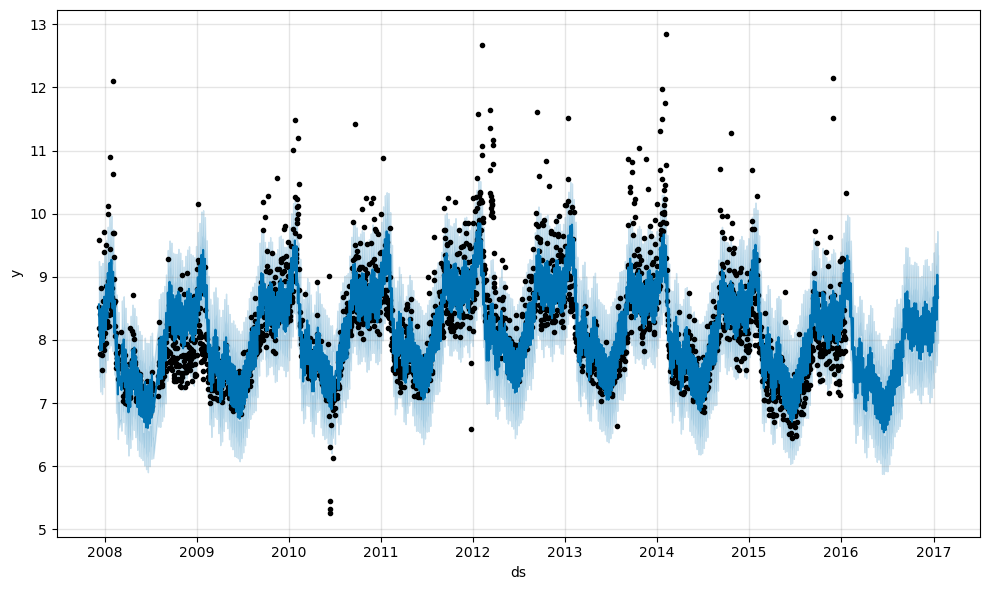

In [36]:
# Python
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  Tahmin görselleştirildiğinde, trendin aşırı uyum (<strong>overfitting</strong>) ya da yetersiz uyum (<strong>underfitting</strong>) yaptığı durumlarda bu parametre gerektiği şekilde ayarlanabilir. Tam otomatik ayar kullanıldığında, bu parametrenin nasıl ayarlanacağıyla ilgili öneriler için çapraz doğrulama (<strong>cross validation</strong>) bölümüne bakılabilir.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Değişim Noktalarının Konumlarını Belirlemek</h2>
  Eğer isterseniz, Prophet'in otomatik <strong>changepoint</strong> (değişim noktası) tespiti yerine, <strong>changepoints</strong> argümanını kullanarak potansiyel değişim noktalarının konumlarını manuel olarak belirleyebilirsiniz. Bu durumda, eğim değişiklikleri yalnızca belirttiğiniz noktalarda gerçekleşir ve yine aynı şekilde <strong>sparse regularization</strong> (seyrek düzenleme) uygulanır.<br>
  Örneğin, otomatik olarak oluşturulan bir grid (ızgara) kullanabilir ve bunu, değişimlerin meydana gelmesi muhtemel olan bazı özel tarihlerle genişletebilirsiniz. Alternatif olarak, <strong>changepoints</strong> sadece birkaç belirli tarihe yerleştirilebilir. Bu şekilde, modelin değişim noktalarını kontrol etme ve daha özelleştirilmiş bir tahmin elde etme imkanı sağlanır.
</font>

16:35:41 - cmdstanpy - INFO - Chain [1] start processing
16:35:41 - cmdstanpy - INFO - Chain [1] done processing


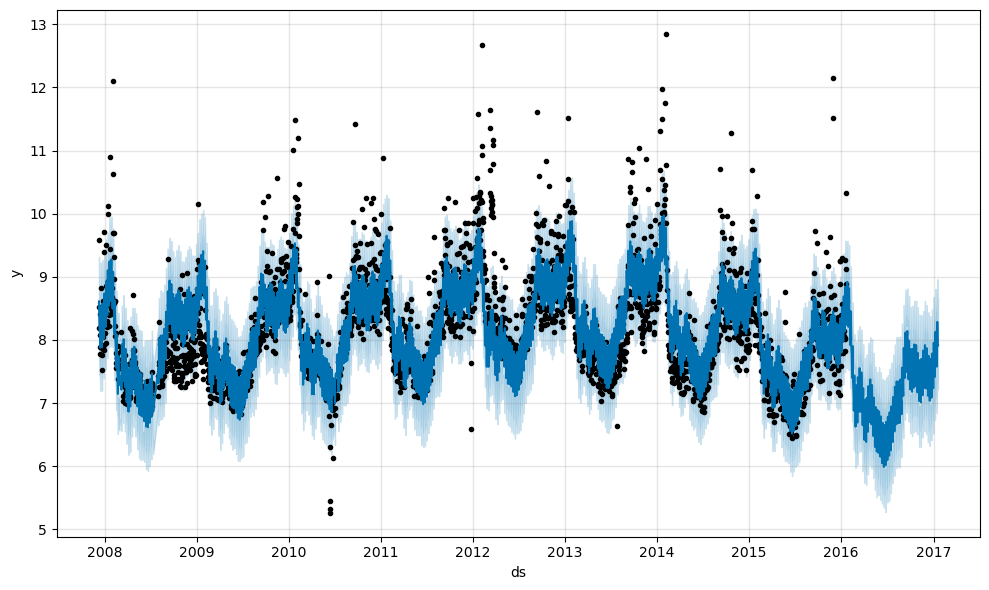

In [37]:
# Python
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)